In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB, BernoulliNB

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('../assests/scaled_voice_data.csv')

In [5]:
df.head()

,meanfreq,sd,median,Q25,Q75,kurt,sp.ent,sfm,mode,meanfun,minfun,modindx,gender
0,-1.017139,2.012536,0.155201,-1.784546,0.116305,-0.230102,1.407711,1.638474,0.699608,1.235429,0.317097,0.185051,female
1,-0.242956,1.167716,0.209318,-0.236093,0.295384,-0.244366,1.617131,1.963082,0.471396,0.061898,-1.072361,0.505507,female
2,0.594624,-0.628856,0.383436,0.459674,0.778532,-0.223221,0.329348,-1.721108,-0.005193,0.131058,0.996114,-0.042381,male
3,0.410492,-1.411220,0.306990,0.786895,-0.472162,-0.225505,-1.279564,-1.029810,0.466451,1.474043,3.100587,0.767026,female
4,0.804964,-1.414826,0.709370,0.811088,0.051118,-0.234219,-0.741627,-1.293786,0.707130,0.488538,0.692233,-0.538644,female


Naive Bayes Implementations

In [6]:
class NavieBayesModel:

    def Gaussian_Naive_Bayes(x_train, y_train, x_test, y_test, i, k, display_stats=False):
        NB_model = GaussianNB()
        NB_model.fit(x_train,y_train)
        y_pred = NB_model.predict(x_test)

        # Accuracy, Precision, Recall, F1-score of Model
        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred, average='weighted')
        recall = metrics.recall_score(y_test, y_pred, average='weighted')
        f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

        if display_stats:
            print(f"Statistics for Fold {i} in K-fold (k={k}) 'Logistic Regression' algorithm")
            print(f"Accuracy: {accuracy}")
            print(f"Precision: {precision}")
            print(f"Recall: {recall}")
            print(f"F1-score: {f1_score}")
            print()
            
        return np.array([accuracy, precision, recall, f1_score])

    def Multinomial_Naive_Bayes(x_train, y_train, x_test, y_test, i, k, display_stats=False):
        NB_model = MultinomialNB()
        NB_model.fit(x_train,y_train)
        y_pred = NB_model.predict(x_test)

        # Accuracy, Precision, Recall, F1-score of Model
        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred, average='weighted')
        recall = metrics.recall_score(y_test, y_pred, average='weighted')
        f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

        if display_stats:
            print(f"Statistics for Fold {i} in K-fold (k={k}) 'Logistic Regression' algorithm")
            print(f"Accuracy: {accuracy}")
            print(f"Precision: {precision}")
            print(f"Recall: {recall}")
            print(f"F1-score: {f1_score}")
            print()
            
        return np.array([accuracy, precision, recall, f1_score])

    def Categorical_Naive_Bayes(x_train, y_train, x_test, y_test, i, k, display_stats=False):
        NB_model = CategoricalNB()
        NB_model.fit(x_train,y_train)
        y_pred = NB_model.predict(x_test)

        # Accuracy, Precision, Recall, F1-score of Model
        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred, average='weighted')
        recall = metrics.recall_score(y_test, y_pred, average='weighted')
        f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

        if display_stats:
            print(f"Statistics for Fold {i} in K-fold (k={k}) 'Logistic Regression' algorithm")
            print(f"Accuracy: {accuracy}")
            print(f"Precision: {precision}")
            print(f"Recall: {recall}")
            print(f"F1-score: {f1_score}")
            print()
            
        return np.array([accuracy, precision, recall, f1_score])

    def Bernoulli_Naive_Bayes(x_train, y_train, x_test, y_test, i, k, display_stats=False):
        NB_model = BernoulliNB()
        NB_model.fit(x_train,y_train)
        y_pred = NB_model.predict(x_test)

        # Accuracy, Precision, Recall, F1-score of Model
        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred, average='weighted')
        recall = metrics.recall_score(y_test, y_pred, average='weighted')
        f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

        if display_stats:
            print(f"Statistics for Fold {i} in K-fold (k={k}) 'Logistic Regression' algorithm")
            print(f"Accuracy: {accuracy}")
            print(f"Precision: {precision}")
            print(f"Recall: {recall}")
            print(f"F1-score: {f1_score}")
            print()
            
        return np.array([accuracy, precision, recall, f1_score])

#### Implementing Gaussian Naive Bayes

In [7]:
def run_Gaussian_NaiveBayes():
    x = df.drop('gender', axis=1)
    y = df['gender']

    k = 10
    i = 0
    k_fold = KFold(n_splits=k)

    # Holds Mean of {accuracy, precision, recall, f1_score}
    mean_stats = np.zeros(4)

    for train_index, test_index in k_fold.split(x):
        x_train, x_test = x.loc[train_index], x.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        stats = NavieBayesModel.Gaussian_Naive_Bayes(x_train, y_train, x_test, y_test, i:=i+1, k, display_stats=False)
        # print(stats)
        mean_stats = mean_stats + stats
        
    # Take mean of {accuracy, precision, recall, f1_score}
    mean_stats = mean_stats / k

    print(f"Mean accuracy: {mean_stats[0]}")
    print(f"Mean Precision: {mean_stats[1]}")
    print(f"Mean Recall: {mean_stats[2]}")
    print(f"Mean F1-score: {mean_stats[3]}")

run_Gaussian_NaiveBayes()

Mean accuracy: 0.899944096154614
Mean Precision: 0.901324193932329
Mean Recall: 0.899944096154614
Mean F1-score: 0.8998483155418237


#### Implementing Bernoulli Naive Byes

In [8]:
def run_Bernoulli_NaiveBayes():
    x = df.drop('gender', axis=1)
    y = df['gender']

    k = 10
    i = 0
    k_fold = KFold(n_splits=k)

    # Holds Mean of {accuracy, precision, recall, f1_score}
    mean_stats = np.zeros(4)

    for train_index, test_index in k_fold.split(x):
        x_train, x_test = x.loc[train_index], x.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        stats = NavieBayesModel.Bernoulli_Naive_Bayes(x_train, y_train, x_test, y_test, i:=i+1, k, display_stats=False)
        # print(stats)
        mean_stats = mean_stats + stats
        
    # Take mean of {accuracy, precision, recall, f1_score}
    mean_stats = mean_stats / k

    print(f"Mean accuracy: {mean_stats[0]}")
    print(f"Mean Precision: {mean_stats[1]}")
    print(f"Mean Recall: {mean_stats[2]}")
    print(f"Mean F1-score: {mean_stats[3]}")

run_Bernoulli_NaiveBayes()

Mean accuracy: 0.8617497903605799
Mean Precision: 0.8639765398839593
Mean Recall: 0.8617497903605799
Mean F1-score: 0.8614960379476353


## ROC-AUC Curve for Gaussian Naive Bayes

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn import metrics
import matplotlib.pyplot as plt

In [10]:
x = df.drop('gender',axis=1)
y = df['gender']

In [11]:
le = LabelEncoder()
Y_encoded = le.fit_transform(y)

In [12]:
xtrain_roc, xtest_roc, ytrain_roc, ytest_roc = train_test_split(x, Y_encoded, test_size=0.2)

In [13]:
def roc_auc(y_test, y_pred):
    fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(8,8))
    lisrt=['male','female']
    for m in range(2):
        ls=[]
        for j in y_test:
            if m==j:
                ls.append(1)
            else:
                ls.append(0)

        fpr, tpr, thresh =  metrics.roc_curve(ls,y_pred[:,m])
        auc = metrics.roc_auc_score(ls,y_pred[:,m])
        axes[m].plot(fpr, tpr,  label="AUC = " +str(auc), linestyle='--',color='red')
        axes[m].set_title(f'ROC-AUC curve for class {lisrt[m]}')
        axes[m].set_xlabel('False Positive Rate')
        axes[m].set_ylabel('True Positive rate')
        axes[m].legend(lisrt[m])
        axes[m].text(0.5,0.0, f'AUC value :{auc}')
        plt.savefig('images/ROC-AUC_Gaussian_Naive_Bayes.png',dpi=300)
        plt.tight_layout()

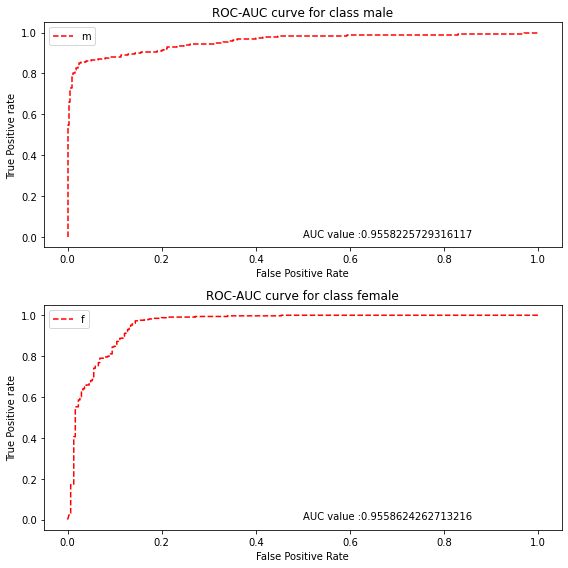

In [14]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(xtrain_roc, ytrain_roc)
ypred_roc = gaussian_nb.predict_proba(xtest_roc)

roc_auc(ytest_roc, ypred_roc)